In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
def calc_prof(bet_amt, odds, correct):
    if correct == False:
        return bet_amt * -1
    else:
        if odds < 0:
            return bet_amt / (odds / -100)
        else:
            return bet_amt * (odds / 100)

In [67]:
df = pd.read_csv('Basketball AI Data.csv')

In [68]:
total_rows = df.shape[0]
pd.options.display.max_rows = total_rows

113


In [69]:
df = df.drop(df.iloc[:, 14:23], axis = 1)

In [70]:
meta_acc = 0
meta_d_acc = 0
meta_u_acc = 0
gem_acc = 0
gem_d_acc = 0
gem_u_acc = 0
cop_acc = 0
cop_d_acc = 0
cop_u_acc = 0
dk_acc = 0

acc_list = [meta_acc, meta_d_acc, meta_u_acc, gem_acc, gem_d_acc, gem_u_acc, cop_acc, cop_d_acc, cop_u_acc, dk_acc]

In [71]:
bet_amt = 5

meta_prof = 0
meta_d_prof = 0
meta_u_prof = 0
gem_prof = 0
gem_d_prof = 0
gem_u_prof = 0
cop_prof = 0
cop_d_prof = 0
cop_u_prof = 0
dk_prof = 0

prof_list = [meta_prof, meta_d_prof, meta_u_prof, gem_prof, gem_d_prof, gem_u_prof, cop_prof, cop_d_prof, cop_u_prof, dk_prof]

In [73]:
n = 1
for i in range(len(acc_list)):
    total_rows = df.shape[0]
    for row in range(total_rows):
        outcome = df.iat[row, 12]
        prediction = df.iat[row, n]
        if prediction == outcome:
            acc_list[i]  += 1
            odds = df.iat[row, 13]
            prof_list[i] += calc_prof(bet_amt, odds, True)
        else:
            prof_list[i] += calc_prof(bet_amt, 0, False)
    n += 1

In [74]:
total_games = df.shape[0]
for i in range(len(acc_list)):
    acc_list[i] = round(100 * (acc_list[i] / total_games), 2)
np.set_printoptions(precision = 2, legacy = '1.25')
for i in range(len(prof_list)):
    prof_list[i] = round(prof_list[i], 2)

[78.76, 74.34, 69.91, 75.22, 75.22, 71.68, 58.41, 67.26, 61.06, 75.22]
[65.95, 42.57, 51.21, 1.02, 40.67, 26.42, -98.36, -29.49, -47.82, -10.45]


In [75]:
avg_acc_per_type = [round((acc_list[0] + acc_list[3] + acc_list[6]) / 3, 2), round((acc_list[1] + acc_list[4] + acc_list[7]) / 3, 2), round((acc_list[2] + acc_list[5] + acc_list[8]) / 3, 2), round(acc_list[9], 2)]

[70.8, 72.27, 67.55, 75.22]


In [76]:
avg_prof_per_type = [round((prof_list[0] + prof_list[3] + prof_list[6]) / 3, 2), round((prof_list[1] + prof_list[4] + prof_list[7]) / 3, 2), round((prof_list[2] + prof_list[5] + prof_list[8]) / 3, 2), round(prof_list[9], 2)]

[-10.46, 17.92, 9.94, -10.45]


In [77]:
avg_acc_per_model = [round((acc_list[0] + acc_list[1] + acc_list[2]) / 3, 2), round((acc_list[3] + acc_list[4] + acc_list[5]) / 3, 2), round((acc_list[6] + acc_list[7] + acc_list[8]) / 3, 2), round(acc_list[9], 2)]

[74.34, 74.04, 62.24, 75.22]


In [78]:
avg_prof_per_model = [round((prof_list[0] + prof_list[1] + prof_list[2]) / 3, 2), round((prof_list[3] + prof_list[4] + prof_list[5]) / 3, 2), round((prof_list[6] + prof_list[7] + prof_list[8]) / 3, 2), round(prof_list[9], 2)]

[53.24, 22.7, -58.56, -10.45]


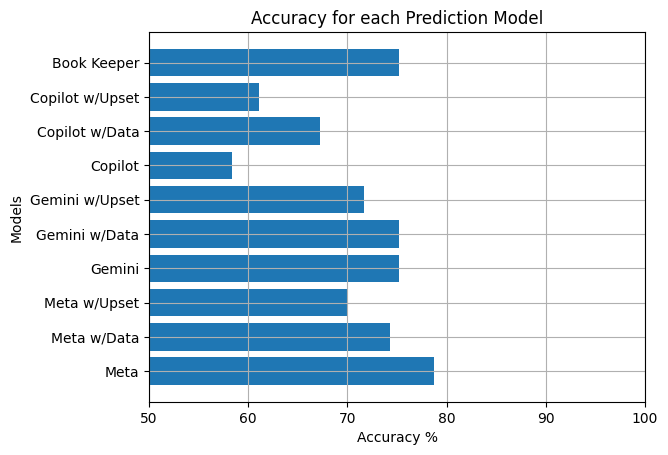

In [122]:
models = ["Meta", "Meta w/Data", "Meta w/Upset", "Gemini", "Gemini w/Data", "Gemini w/Upset", "Copilot", "Copilot w/Data", "Copilot w/Upset", "Book Keeper"]
plt.barh(models, acc_list)
plt.xlim(50, 100)
plt.xlabel("Accuracy %")
plt.ylabel("Models")
plt.title("Accuracy for each Prediction Model")
plt.grid()
plt.show()

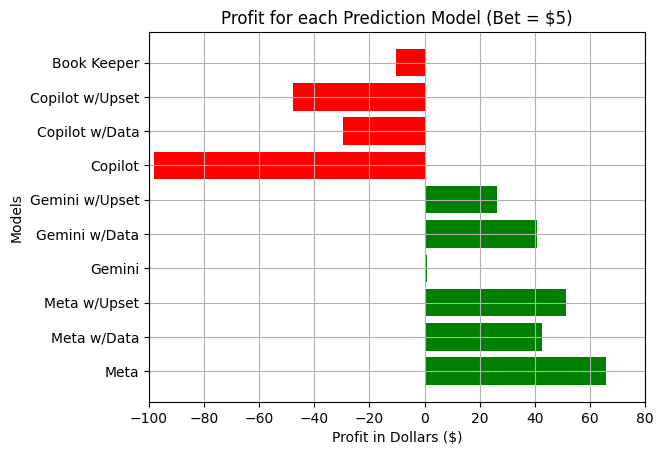

In [124]:
models = ["Meta", "Meta w/Data", "Meta w/Upset", "Gemini", "Gemini w/Data", "Gemini w/Upset", "Copilot", "Copilot w/Data", "Copilot w/Upset", "Book Keeper"]
colors = ['green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red']
plt.barh(models, prof_list, color = colors)
plt.xlim(-100, 80)
plt.title("Profit for each Prediction Model (Bet = $5)")
plt.xlabel("Profit in Dollars ($)")
plt.ylabel("Models")
plt.grid()
plt.show()

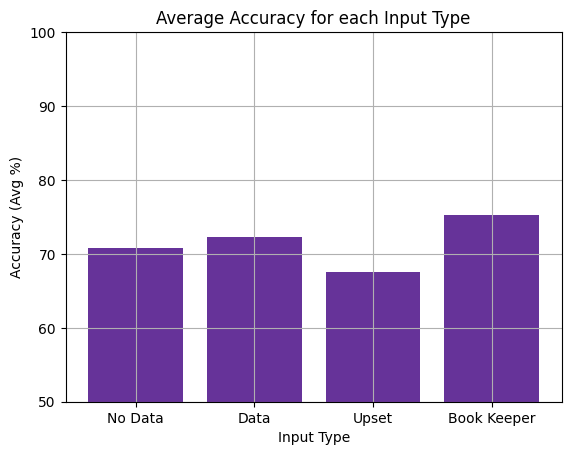

In [123]:
models = ["No Data", "Data", "Upset", "Book Keeper"]
plt.bar(models, avg_acc_per_type, color = 'rebeccapurple')
plt.ylim(50, 100)
plt.title("Average Accuracy for each Input Type")
plt.xlabel("Input Type")
plt.ylabel("Accuracy (Avg %)")
plt.grid()
plt.show()

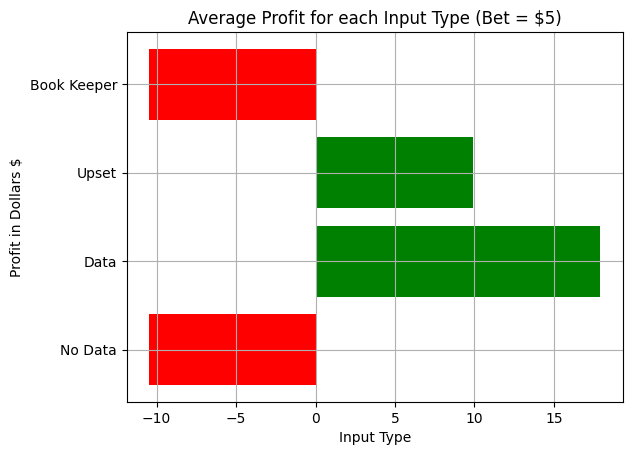

In [145]:
models = ["No Data", "Data", "Upset", "Book Keeper"]
plt.barh(models, avg_prof_per_type, color = ['red', 'green', 'green', 'red'])
plt.title("Average Profit for each Input Type (Bet = $5)")
plt.xlabel("Input Type")
plt.ylabel("Profit in Dollars $")
plt.grid()
plt.show()

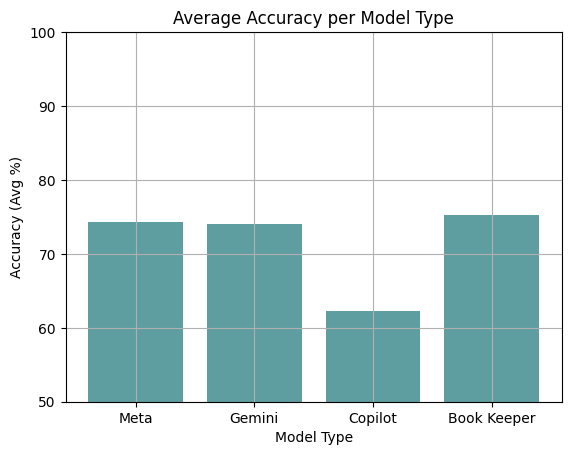

In [148]:
models = ["Meta", "Gemini", "Copilot", "Book Keeper"]
plt.bar(models, avg_acc_per_model, color = 'cadetblue')
plt.ylim(50,100)
plt.title("Average Accuracy per Model Type")
plt.xlabel("Model Type")
plt.ylabel("Accuracy (Avg %)")
plt.grid()
plt.show()

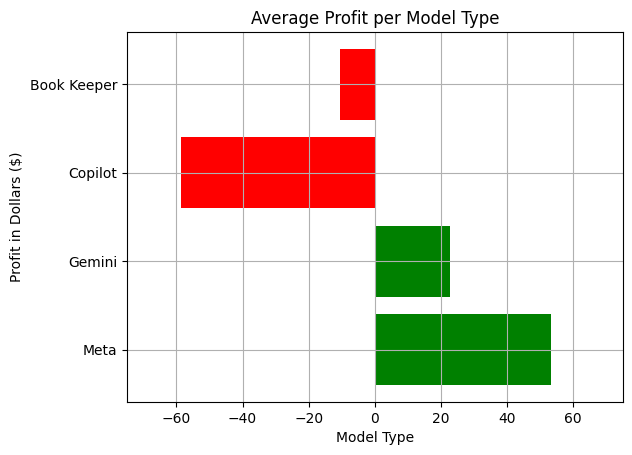

In [149]:
models = ["Meta", "Gemini", "Copilot", "Book Keeper"]
plt.barh(models, avg_prof_per_model, color = ['green', 'green', 'red', 'red'])
plt.xlim(-75,75)
plt.title("Average Profit per Model Type")
plt.xlabel("Model Type")
plt.ylabel("Profit in Dollars ($)")
plt.grid()
plt.show()